# importing the relevant packages

In [1]:
%matplotlib inline
import pandas as pd

In [2]:
#v=pd.DataFrame()
#print(help(v.merge))

### reading the data

In [4]:
mortality_rates = pd.read_csv('mortality.csv')
mortality_rates.shape


(5044, 5)

In [5]:
mortality_rates.isnull().sum()

Country                                                                                      0
Year                                                                                         0
Infant mortality rate (probability of dying between birth and age 1 per 1000 live births)    0
Neonatal mortality rate (per 1000 live births)                                               0
Under-five mortality rate (probability of dying by age 5 per 1000 live births)               0
dtype: int64

In [6]:
mortality_rates.head()

,Country,Year,Infant mortality rate (probability of dying between birth and age 1 per 1000 live births),Neonatal mortality rate (per 1000 live births),Under-five mortality rate (probability of dying by age 5 per 1000 live births)
0,Afghanistan,2015,66.3 [52.7-83.9],35.5 [19.2-56.4],91.1 [69.6-118.8]
1,Afghanistan,2014,68.1 [55.7-83.6],36.1 [19.5-57.5],93.9 [74.5-118.3]
2,Afghanistan,2013,69.9 [58.7-83.5],36.8 [20.1-58.6],96.7 [79.1-118.2]
3,Afghanistan,2012,71.7 [61.6-83.7],37.4 [20.4-60.0],99.5 [83.8-118.5]
4,Afghanistan,2011,73.4 [64.4-84.2],38.1 [20.7-61.0],102.3 [88.1-119.3]


In [7]:
mortality_rates.columns


Index(['Country', 'Year',
       'Infant mortality rate (probability of dying between birth and age 1 per 1000 live births)',
       'Neonatal mortality rate (per 1000 live births)',
       'Under-five mortality rate (probability of dying by age 5 per 1000 live births)'],
      dtype='object')

In [8]:
mortality_rates.describe()

,Year
count,5044.000000
mean,2002.500000
std,7.500744
min,1990.000000
25%,1996.000000
50%,2002.500000
75%,2009.000000
max,2015.000000


Each row in the data represents three different indicators for a particular country in a particular year:
 - Infant mortality rate (probability of dying between birth and age 1 per 1000 live births) 	
 - Neonatal mortality rate (per 1000 live births)
 - Under-five mortality rate (probability of dying by age 5 per 1000 live births)

> Let us start with exploring if these infant mortality indicators have improved over time?

> DataPreprocessing Start Here

In [7]:
mortality_rates = mortality_rates [['Country', 'Year',
                                    'Under-five mortality rate\
                                    (probability of dying by age\
                                    5 per 1000 live births)']]

# the name of the last column is too long, let's keep it short
mortality_rates.rename(columns= 
                       {'Under-five mortality rate (probability of\ 
                        dying by age 5 per 1000 live births)'
                        :'under5_m_rate'}, inplace=True)

In [8]:
mortality_rates.columns
mortality_rates.head()

,Country,Year,under5_m_rate
0,Afghanistan,2015,91.1 [69.6-118.8]
1,Afghanistan,2014,93.9 [74.5-118.3]
2,Afghanistan,2013,96.7 [79.1-118.2]
3,Afghanistan,2012,99.5 [83.8-118.5]
4,Afghanistan,2011,102.3 [88.1-119.3]


We have to slice data from under5_m_rate column because data is not in good form

In [9]:
#take this as example for slicing one column entry then apply for whole column
mortality_rates['under5_m_rate'][0][0:4]

'91.1'

In [11]:
mortality_rates['under5_m_rate'][4].split(' ')[0]

'102.3'

In [12]:
# A helper function to pre process the data into a usable form
def slice_rates(rate):
    return float( rate.split(' ')[0] )



In [13]:
#Applying function on datafrmaes single column
mortality_rates['under5_m_rate'] =
mortality_rates['under5_m_rate'].apply(slice_rates)


In [14]:
mortality_rates.head()

,Country,Year,under5_m_rate
0,Afghanistan,2015,91.1
1,Afghanistan,2014,93.9
2,Afghanistan,2013,96.7
3,Afghanistan,2012,99.5
4,Afghanistan,2011,102.3


In [20]:
mortality_rates.shape

(5044, 3)

In [21]:
mortality_rates.describe()

,Year,under5_m_rate
count,5044.000000,5044.000000
mean,2002.500000,52.237550
std,7.500744,55.236709
min,1990.000000,1.900000
25%,1996.000000,11.900000
50%,2002.500000,28.300000
75%,2009.000000,78.300000
max,2015.000000,328.200000


In [22]:
mortality_rates[mortality_rates['Year'] == 1990].
sort_values(by = 'under5_m_rate')[:5]

,Country,Year,under5_m_rate
2235,Japan,1990,6.3
2001,Iceland,1990,6.4
1585,Finland,1990,6.7
4341,Sweden,1990,6.9
3613,Republic of Korea,1990,7.1


In [23]:
def yearly_data(year):
    """
    returns country wise mortality rate in ascending order 
    for a given year
    """
    m_rates = mortality_rates[mortality_rates['Year'] == year].copy()
    #slicing for the given year
    m_rates.drop('Year', axis=1, inplace=True) 
    #dropping the year column which is now irrelevant
    m_rates.set_index('Country', inplace=True) 
    #setting the index to country for easier operations
    return m_rates.sort_values(by = 'under5_m_rate') 
    #returning the sorted data

In [24]:
m_rates_1990 = yearly_data(1990)

> 5 countires with the best mortality rate in 1990

In [25]:
m_rates_1990.head(10)

,under5_m_rate
Country,
Japan,6.3
Iceland,6.4
Finland,6.7
Sweden,6.9
Republic of Korea,7.1
Singapore,7.7
Monaco,7.8
Switzerland,8.2
Canada,8.3


> 5 countries with the worst mortality rate in 1990

In [26]:
m_rates_1990[-5:]

,under5_m_rate
Country,
South Sudan,253.2
Mali,254.4
Liberia,255.0
Sierra Leone,264.3
Niger,328.2


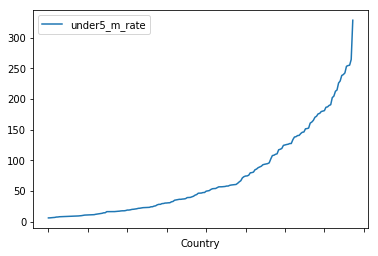

In [27]:
m_rates_1990.plot()

> The graph shows the stark variation in mortality rates, there are countries with mortality rates under 50 or even under 10, and then there are the ones with a rate over 200 and even 300

The line plot is a good visualisation for bringing out the disparity in mortality rates, but let us plot a bar graph of a select few countries to get a more clear view

In [28]:
#If we want to see the data for all over the world

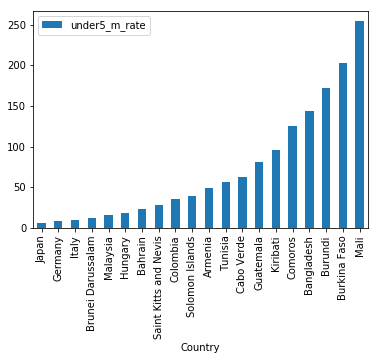

In [29]:
m_rates_1990.iloc[::10, :].plot.bar()

#### Problem 2
graph the under-five mortality rates as above, but for 2015.

In [30]:
m_rates_2015 = yearly_data(2015)

> 5 countires with the best mortality rate in 2015

In [31]:
m_rates_2015.head()

,under5_m_rate
Country,
Luxembourg,1.9
Iceland,2.0
Finland,2.3
Slovenia,2.6
Norway,2.6


> 5 countires with the worst mortality rate in 2015

In [32]:
m_rates_2015[-5:]

,under5_m_rate
Country,
Sierra Leone,120.4
Central African Republic,130.1
Somalia,136.8
Chad,138.7
Angola,156.9


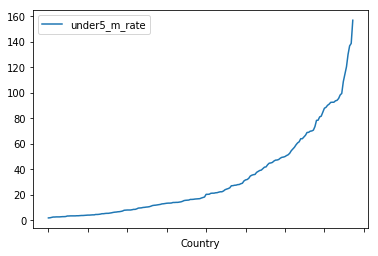

In [33]:
m_rates_2015.plot()

> The stark variation between mortality rates across countries observed in 1990 is still prevelant in 2015 but this time the peak has reduced from over 300 to less than 150!

> Let us examine this disparity a little more clearly for a select few countries in a bar graph

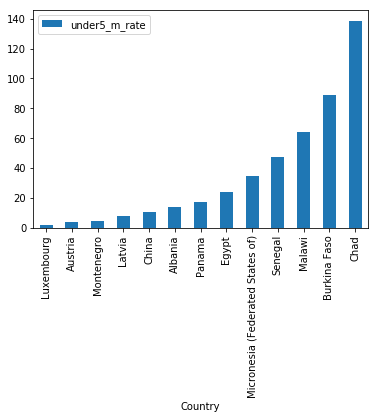

In [34]:
m_rates_2015.iloc[::16, :].plot.bar()

#### Next Problem 
choose three representative countries in different areas of the world, then create a line graph showing the trends in under-five mortality in those countries over the years from 1990 to 2015.

In [15]:
def country_data(country):
    """
    returns year wise mortality rate for a particular country
    """
    country_df = mortality_rates[mortality_rates['Country'] 
                                 ==  country].copy() 
    #slicing data for the particular country
    country_df.drop('Country', axis = 1, inplace=True) 
    #dropping the country column which is now irrelvant
    country_df.set_index('Year', inplace=True) 
    #setting the index as year to facilitate easier merge 
    #operations
    country_df.columns = [country] 
    #setting the name of the column to the country name
    return country_df

In [20]:
cd=country_data("India")
cd

,India
Year,
2015,47.7
2014,49.8
2013,52.1
2012,54.5
2011,57.2
2010,59.9
2009,62.7
2008,65.6
2007,68.5


For this problem, let us choose 3 countries from 3 different parts of the world :
1. Sweden : 
One of the most developed countries in the world from Scandivania.
2. Mali :
One of the most underdeveloped countires in the world from Africa.
3. India :
A country that is devloping very fast from Asia.

In [16]:
sweden_data = country_data('Sweden')
mali_data = country_data('Mali')
india_data = country_data('India')

In [34]:
sweden_data

,Sweden
Year,
2015,3.0
2014,3.0
2013,3.0
2012,3.0
2011,3.0
2010,3.1
2009,3.1
2008,3.2
2007,3.3


In [35]:
# Merging the data for the three countries into a single dataframe
india_sweden = india_data.merge(sweden_data, left_index=True, 
                                right_index=True)

three_countries = india_sweden.merge(mali_data, left_index=True, 
                                     right_index=True)

In [36]:
three_countries.head()

,India,Sweden,Mali
Year,,,
2015,47.7,3.0,114.7
2014,49.8,3.0,118.3
2013,52.1,3.0,122.7
2012,54.5,3.0,127.0
2011,57.2,3.0,131.7


> Now that we have our data in a suitable format, let us visualise it!

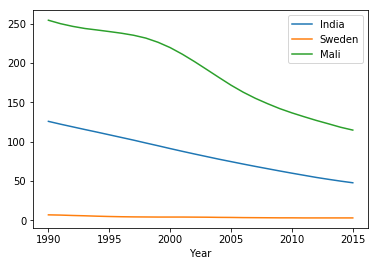

In [37]:
three_countries.plot()

Observations
- Mali is the worst hit country when it comes to under 5 mortality rate, at the same time though, it is making significant improvements
- India has been showing a linear improvement
- Sweden already had a really good record, now it is touching close to 0 'under 5 mortality rates'

#### Next Problem  
for those same three countries, graph the reduction in under-five mortality rates over the 1990/2015 period - that is, the 1990 rate divided by the 2015 rate.

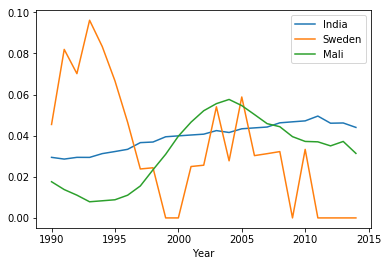

In [38]:
three_countries.pct_change().plot()

Observations :
 - India has been showing a very consistent improvement
 - Mali's rate of improvement peaked near the turn of the century, since than it has been on a decline
 - Sweden already has a very low under 5 mortality rate, which explains the haphazard pattern in it's rate of improvement over time

> We have observed the trend for different countries of the world, how do we analyse our progress on the whole, together as a planet

In [42]:
world_mortality_rates = pd.Series() # Initialising an empty series

for year, group in mortality_rates.groupby('Year'):
    #print(group)
    world_mortality_rates = world_mortality_rates.\
    append(pd.Series(group['under5_m_rate'].mean(), index=[year]))

In [43]:
world_mortality_rates.head()

1990    72.543299
1991    71.063402
1992    69.684021
1993    68.422680
1994    67.624742
dtype: float64

> We now have year wise average under 5 mortality rate for the entire world, let us visualise it

ALthough these averages aren't absolute given the difference in populations of different countries, these values are really good indicators of our progress on this parameter!

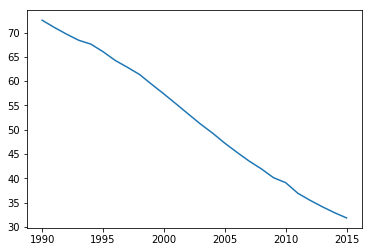

In [49]:
world_mortality_rates.plot()

#### Conclusions
 - The average rate of under 5 mortality rates for all the countries of the world aggregated together has been falling very consistently from 1990 to 2015
 - We can be very hopeful about acheiving this SDG (Sustainable Development Goal) by 2030

#### processing the countries data

In [38]:
countries = pd.read_csv('countries.csv')

In [39]:
countries.head(2)

,DimensionCode,DimensionMemberCode,DisplayString,DisplaySequence,URL,DS,FIPS,GEOMETRY,IOC,ISO,...,SHORTNAMEFR,WHO,WHOLEGALSTATUS,WHO_REGION,WHO_REGION_CODE,WMO,WORLD_BANK_INCOME_GROUP,WORLD_BANK_INCOME_GROUP_CODE,WORLD_BANK_INCOME_GROUP_GNI_REFERENCE_YEAR,WORLD_BANK_INCOME_GROUP_RELEASE_DATE
0,COUNTRY,AFG,Afghanistan,10,NaN,AFG,AF,AFG,AFG,AFG,...,Afghanistan,AFG,M,Eastern Mediterranean,EMR,AF,Low-income,WB_LI,2015.0,2016.0
1,COUNTRY,ALB,Albania,20,NaN,AL,AL,ALB,ALB,ALB,...,Albanie,ALB,M,Europe,EUR,AB,Upper-middle-income,WB_UMI,2015.0,2016.0


> This dataframe contains a lot of information, we only need some of it, let us remove the excess.

In [40]:
# Removing the rows where 'SHORTNAMEFR' is null

countries.dropna(subset = ['SHORTNAMEFR'], inplace=True)

In [41]:
# Slicing the columns that we need
# We use 'DisplayString' instead of 'SHORTNAMEFR' this time because it has the right spellings for the countries
countries = countries[['DisplayString', 'WHO_REGION', 
                       'WORLD_BANK_INCOME_GROUP']]

In [42]:
countries.head(2)

,DisplayString,WHO_REGION,WORLD_BANK_INCOME_GROUP
0,Afghanistan,Eastern Mediterranean,Low-income
1,Albania,Europe,Upper-middle-income


> Now our data is ready to be merged with under 5 mortality rates data

In [43]:
#mortality_rates = pd.read_csv('mortality_processed.csv')

meta_data = mortality_rates.merge(countries, 
                                  left_on='Country',
                            right_on='DisplayString')
meta_data.drop(['DisplayString', 'Country'], 
               axis=1, inplace=True) 
#dropping the columns we no longer need

In [44]:
meta_data.head(2)

,Year,under5_m_rate,WHO_REGION,WORLD_BANK_INCOME_GROUP
0,2016,70.4,Eastern Mediterranean,Low-income
1,2015,73.2,Eastern Mediterranean,Low-income


> Now we have the data in the right form, let us go ahead and analyze some trends

### Regional Trends

In [45]:
# Creating a empty dataframe that shall store 
#average performance of different regions
regions = meta_data['WHO_REGION'].unique()

years = meta_data['Year'].unique()

regional_trends = pd.DataFrame(columns = regions, 
                               index = years)
regional_trends.head()

,Eastern Mediterranean,Europe,Africa,Americas,Western Pacific,South-East Asia
2016,NaN,NaN,NaN,NaN,NaN,NaN
2015,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN
2012,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
regional_trends.head()

,Eastern Mediterranean,Europe,Africa,Americas,Western Pacific,South-East Asia
2016,NaN,NaN,NaN,NaN,NaN,NaN
2015,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,NaN,NaN
2012,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
# Filling the regional_trends dataframe year wise and 
#region wise
for name, group in meta_data.groupby(['WHO_REGION', 'Year']):
    region, year = name
    print(name)
    print(group)
    break
    regional_trends.loc[year, region] =   group['under5_m_rate'].mean()
    
regional_trends.head(2)

,Eastern Mediterranean,Europe,Africa,Americas,Western Pacific,South-East Asia
2016,32.7619,8.20943,68.0064,17.8943,22.2,29.1909
2015,33.6857,8.51509,70.6723,18.38,22.8815,30.4636


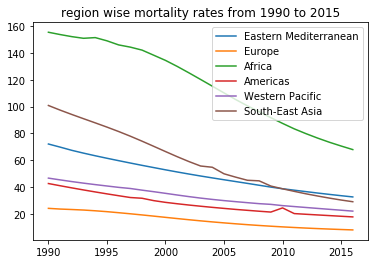

In [60]:
regional_trends.plot(title = 'region wise mortality rates from 1990 to 2015')

 - Not surprisngly, the western countries seam to be doing much better then their eastern counterparts on this demographic
 - Let us see which regions are progressing at a rate faster than others


In [61]:
regional_trends.mean()

Eastern Mediterranean     49.705644
Europe                    15.647729
Africa                   116.711348
Americas                  27.703915
Western Pacific           33.092318
South-East Asia           60.117845
dtype: float64

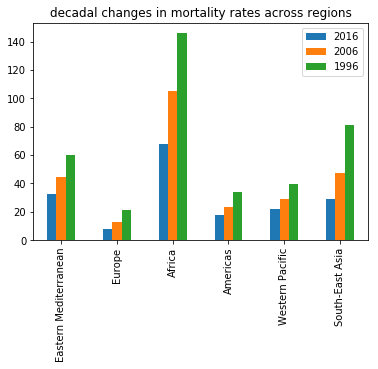

In [74]:
# visualising under 5 mortality rates at 10 year 
#intervals for different regions
regional_trends.transpose().iloc[:,::10].plot.bar
(title = 'decadal changes in mortality rates \
 across regions')

All regions have been making making progress, the challenge for Africa has been much more bigger but it has been making improvements at equally big scales!

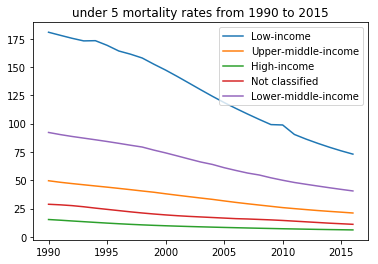

In [63]:
# Creating a empty dataframe that shall store average performance of different income groups
income_groups = meta_data.WORLD_BANK_INCOME_GROUP.unique()
income_and_mortality = pd.DataFrame(columns = income_groups,index = years)

# Filling the dataframe year wise and income group wise
for name, group in meta_data.groupby(['WORLD_BANK_INCOME_GROUP', 'Year']):
    income_group, year = name
    income_and_mortality.loc[year, income_group] =  group['under5_m_rate'].mean()

income_and_mortality.plot(title = 'under 5 mortality rates from 1990 to 2015')

 - This is a very surprising trend! It shows that under 5 mortality rate is directly proportional to the income of the indivisuals! 
 - Let us examine this situation for the present year 

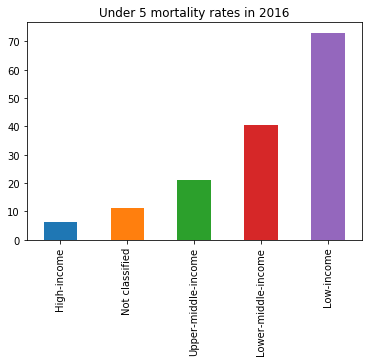

In [64]:
# Examining the latest situation
income_and_mortality.loc[2016].sort_values().plot.
bar(title = 'Under 5 mortality rates in 2016')

 - Since there is a strong correlation between incomes and mortality rates, focussing efforts on economic development should also help acheive this sustainable development goal!

In [ ]:
#income_and_mortality.to_csv("incomegroup.csv", index=False)

In [ ]:
print()